

### Advanced Machine Learning

# Working with Text Data

26/04/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)





# More kinds of data


- So far:
  * Fixed number of features
  * Contiguous
  * Categorical





- Next up:
  * No pre-defined features
  * Free text
  * (Images, Audio, video, graphs, ...: not this class)




# Typical Text Data

<br>
<center>
<img src="./images/typical_text_data_1.png" style="width: 600px;">
</center>
<br>
<br>
<center>
<img src="./images/typical_text_data_2.png" style="width: 600px;">
</center>






# Other Types of text data

<center>
<img src="./images/other_types_of_text_data.png" style="width: 600px;">
</center>





# Bag of Words
<br>


<center>
<img src="./images/bag_of_words.png" style="width: 600px;">
</center>



## Toy Example




In [23]:
malory = ["Do you want Ants? I want you",
          "Because that’s how you get ants ants."]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(malory)
print(vect.get_feature_names())


['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']


In [21]:


X = vect.transform(malory)
print(X.toarray())
#print(X)



[[1 0 1 0 0 0 2 2]
 [2 1 0 1 1 1 0 1]]



# "bag"


```python
print(malory)
print(vect.inverse_transform(X)[0])
print(vect.inverse_transform(X)[1])
```

```
['Do you want ants?', 'Because that’s how you get ants.']
['ants' 'do' 'want' 'you']
['ants' 'because' 'get' 'how' 'that' 'you']
```





# Text classification example:
# IMDB Movie Reviews

In [24]:
# Data loading

from sklearn.datasets import load_files
import numpy as np
reviews_train = load_files("./data/aclImdb/train/")

text_trainval, y_trainval = reviews_train.data, reviews_train.target
print("type of text_train: ", type(text_trainval))
print("length of text_train: ", len(text_trainval))
print("class balance: ", np.bincount(y_trainval))


type of text_train:  <class 'list'>
length of text_train:  25000
class balance:  [12500 12500]


In [30]:
y_trainval[12501]

1

In [33]:
#Data loading
print("text_train[1]:")
print(text_trainval[1].decode())


text_train[1]:
Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you're choice over this one, even the "Turbulenc

In [34]:
#Vectorization

from sklearn.model_selection import train_test_split

text_trainval = [doc.replace(b"<br />", b" ") for doc in text_trainval]
text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)
vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)
X_train

<18750x66651 sparse matrix of type '<class 'numpy.int64'>'
	with 2569474 stored elements in Compressed Sparse Row format>

In [35]:
#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])



['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007']
['eschews', 'escort', 'escorted', 'escorting', 'escorts', 'escpecially', 'escreve', 'escrow', 'esculator', 'ese', 'eser', 'esha', 'eshaan', 'eshley', 'esk', 'eskimo', 'eskimos', 'esmerelda', 'esmond', 'esophagus']
['00', 'ahoy', 'aspects', 'belting', 'bridegroom', 'cements', 'commas', 'crowds', 'detlef', 'druids', 'eschews', 'finishing', 'gathering', 'gunrunner', 'homesickness', 'inhumanities', 'kabbalism', 'leech', 'makes', 'miki', 'nas', 'organ', 'pesci', 'principally', 'rebours', 'robotnik', 'sculptural', 'skinkons', 'stardom', 'syncer', 'tools', 'unflagging', 'waaaay', 'yanks']


In [36]:
#Classification

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
lr.score(X_val, y_val)

0.87488

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [39]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

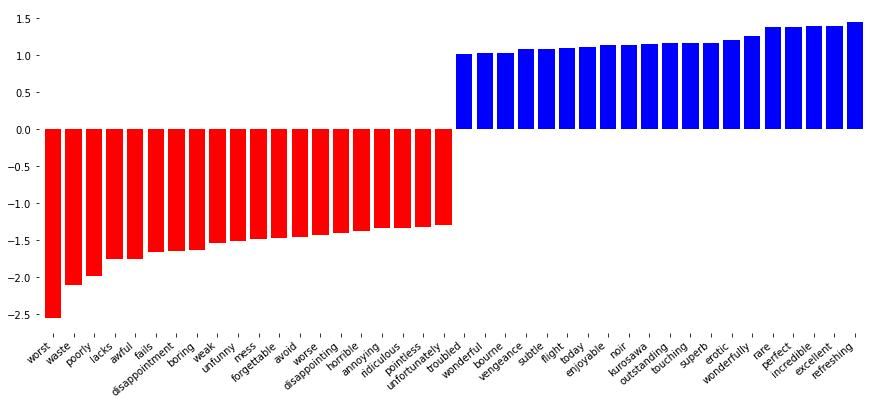

In [40]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

# break


# Soo many options!

- How to tokenize?
- How to normalize words?
- What to include in vocabulary?



# Tokenization
- Scikit-learn (very simplistic):
  * `re.findall(r"\b\w\w+\b")`
  * Includes numbers
  * discards single-letter words
  * `-` or `'` break up words

In [50]:
#Changing the token pattern regex
print(malory)
vect = CountVectorizer()
vect.fit(malory)
print(vect.get_feature_names())

vect = CountVectorizer(token_pattern=r"\b\w+\b")
vect.fit(malory)
print(vect.get_feature_names())

vect = CountVectorizer(token_pattern=r"\b\w[\w’]+\b")
vect.fit(malory)
#vect.fit(["malory@gmail.com","http://www.cnn.com/homepage","it costs $13.44"])
print(vect.get_feature_names())


['Do you want Ants? I want you', 'Because that’s how you get ants ants.']
['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']
['ants', 'because', 'do', 'get', 'how', 'i', 's', 'that', 'want', 'you']
['ants', 'because', 'do', 'get', 'how', 'that’s', 'want', 'you']




# Normalization

- lowercase
- Correct spelling?
- Stemming: reduce to word stem
- Lemmatization: smartly reduce to word stem




<pre><code>"Our meeting today was worse than yesterday,
I'm scared of meeting the clients tomorrow."
</code></pre>

Stemming:<br/>
`
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i',
 "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
`

Lemmatization:<br/>
`
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i',
 'be', 'scar', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
`

- scikit-learn:
  * Lower-case it
  * Configurable, use nltk or spacy





# Restricting the Vocabulary

In [54]:
# stopwords
print(malory)
vect = CountVectorizer(stop_words='english')
vect.fit(malory)
print(vect.get_feature_names())

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#print(list(ENGLISH_STOP_WORDS))

['Do you want Ants? I want you', 'Because that’s how you get ants ants.']
['ants', 'want']


In [55]:
# Infrequent Words

#Remove words that appear in less than 2 documents:
vect = CountVectorizer(min_df=2)
vect.fit(malory)
print(vect.get_feature_names())

#Restrict vocabulary size to max_features most frequent words:
vect = CountVectorizer(max_features=4)
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'you']
['ants', 'because', 'want', 'you']


In [56]:
vect = CountVectorizer(min_df=2)
X_train_df2 = vect.fit_transform(text_train)

vect = CountVectorizer(min_df=4)
X_train_df4 = vect.fit_transform(text_train)
X_val_df4 = vect.transform(text_val)

print(X_train.shape)
print(X_train_df2.shape)
print(X_train_df4.shape)

(18750, 66651)
(18750, 39824)
(18750, 26927)


In [57]:
#lr = LogisticRegressionCV().fit(X_train_df4, y_train)
#print(lr.C_)
lr = LogisticRegression().fit(X_train_df4, y_train)

lr.score(X_val_df4, y_val)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8728


# Tf-idf rescaling

$$ \text{tf-idf}(t,d) = \text{tf}(t,d)\cdot \text{idf}(t)$$

$$ \text{idf}(t) = \log\frac{1+n_d}{1+\text{df}(d,t)} + 1$$

$n_d$ = total number of documents <br/>
$df(d,t)$ = number of documents containing term $t$





* In sklearn: by default also L2 normalisation!


In [61]:
#TfidfVectorizer, TfidfTransformer


from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
malory_tfidf = TfidfVectorizer().fit_transform(malory)
print(malory_tfidf.toarray())

malory_tfidf = make_pipeline(CountVectorizer(),
                             TfidfTransformer()).fit_transform(malory)
print(malory_tfidf.toarray())

[[0.259 0.    0.364 0.    0.    0.    0.729 0.519]
 [0.557 0.391 0.    0.391 0.391 0.391 0.    0.278]]
[[0.259 0.    0.364 0.    0.    0.    0.729 0.519]
 [0.557 0.391 0.    0.391 0.391 0.391 0.    0.278]]


In [64]:
# L1 normalization with CountVectorizer

from sklearn.preprocessing import normalize
malory_vec = CountVectorizer().fit_transform(malory)
print(malory_vec.toarray())

print(normalize(malory_vec,norm="l1").toarray())

[[1 0 1 0 0 0 2 2]
 [2 1 0 1 1 1 0 1]]
[[0.167 0.    0.167 0.    0.    0.    0.333 0.333]
 [0.286 0.143 0.    0.143 0.143 0.143 0.    0.143]]



# N-grams: Beyond single words
- Bag of words completely removes word order.
- "didn't love" and "love" are very different!






<center>
<img src="./images/single_words.png" style="width: 600px;">
</center>


In [65]:
# Bigrams toy example - what would be the difference?
cv = CountVectorizer(ngram_range=(1, 1)).fit(malory)
print("Vocabulary size: ", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())

print("-----------")
cv = CountVectorizer(ngram_range=(2, 2)).fit(malory)
print("Vocabulary size: ", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())

print("-----------")
cv = CountVectorizer(ngram_range=(1, 2)).fit(malory)
print("Vocabulary size: ", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())



Vocabulary size:  8
Vocabulary:
 ['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']
-----------
Vocabulary size:  11
Vocabulary:
 ['ants ants', 'ants want', 'because that', 'do you', 'get ants', 'how you', 'that how', 'want ants', 'want you', 'you get', 'you want']
-----------
Vocabulary size:  19
Vocabulary:
 ['ants', 'ants ants', 'ants want', 'because', 'because that', 'do', 'do you', 'get', 'get ants', 'how', 'how you', 'that', 'that how', 'want', 'want ants', 'want you', 'you', 'you get', 'you want']



# N-grams on IMDB data


```
Vocabulary Sizes
1-gram (min_df=4): 26928
2-gram (min_df=4): 128426
1-gram & 2-gram (min_df=4): 155354
1-3gram (min_df=4): 254274
1-4gram (min_df=4): 289443
```

```
Vocabulary size 1-4gram (min_df=1): 7794517
```


- More than 20x more 4-grams!

In [ ]:
cv = CountVectorizer(ngram_range=(1, 4)).fit(text_train)
print("Vocabulary size 1-4gram: ", len(cv.vocabulary_))


In [67]:
#Stop-word impact on bi-grams - any difference if stopwords included or not?

cv = CountVectorizer(ngram_range=(1, 2), min_df=4)
cv.fit(text_train)
print("(1, 2), min_df=4: ", len(cv.vocabulary_))
cv = CountVectorizer(ngram_range=(1, 2), min_df=4,
                     stop_words="english")
cv.fit(text_train)
print("(1, 2), stopwords, min_df=4: ", len(cv.vocabulary_))


(1, 2), min_df=4:  154021
(1, 2), stopwords, min_df=4:  78605


In [68]:
#Stop-word impact on 4-grams - what would be the magnitude of impact here (if at all?)
cv4 = CountVectorizer(ngram_range=(4, 4), min_df=4)
cv4.fit(text_train)
cv4sw = CountVectorizer(ngram_range=(4, 4), min_df=4,
                       stop_words="english")
cv4sw.fit(text_train)
print(len(cv4.get_feature_names()))
print(len(cv4sw.get_feature_names()))

31585
369


In [69]:
bla = cv4sw.transform(text_train)
print(np.array(cv4sw.get_feature_names())[np.argsort(np.array(bla.sum(axis=0)).ravel())[::-1][:50]])

['worst movie ve seen' '40 year old virgin' 've seen long time'
 'worst movies ve seen' 'don waste time money'
 'mystery science theater 3000' 'worst film ve seen'
 'lose friends alienate people' 'best movies ve seen'
 'don waste time watching' 'jean claude van damme'
 'really wanted like movie' 'best movie ve seen' 'rock roll high school'
 'don think ve seen' 'let face music dance' 'don say didn warn'
 'worst films ve seen' 'fred astaire ginger rogers' 'ha ha ha ha'
 'la maman et la' 'maman et la putain' 'left cutting room floor'
 've seen ve seen' 'just doesn make sense' 'robert blake scott wilson'
 'late 70 early 80' 'crouching tiger hidden dragon' 'low budget sci fi'
 'movie ve seen long' 'toronto international film festival'
 'night evelyn came grave' 'good guys bad guys' 'low budget horror movies'
 'waste time watching movie' 'vote seven title brazil' 'bad bad bad bad'
 'morning sunday night monday' '14 year old girl' 'film based true story'
 'don make em like' 'silent night dead


<center>
<img src="./images/stopwords_1.png" style="width: 600px;">
</center>


<center>
<img src="./images/stopwords_2.png" style="width: 600px;">
</center>


In [70]:
my_stopwords = set(ENGLISH_STOP_WORDS)
my_stopwords.remove("well")
my_stopwords.remove("not")
my_stopwords.add("ve")
vect3msw = CountVectorizer(ngram_range=(1, 3), min_df=4, stop_words=my_stopwords)
X_train3msw = vect3msw.fit_transform(text_train)
#lr3msw = LogisticRegressionCV().fit(X_train3msw, y_train)
lr3msw = LogisticRegression().fit(X_train3msw, y_train)
X_val3msw = vect3msw.transform(text_val)
lr3msw.score(X_val3msw, y_val)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.884

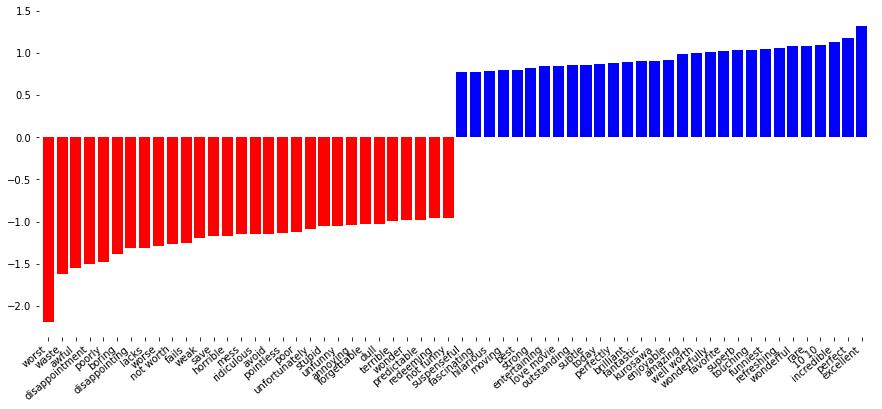

In [71]:
plt.figure(figsize=(15, 6))
plot_important_features(lr3msw.coef_.ravel(), np.array(vect3msw.get_feature_names()), top_n=30, rotation=40)
ax = plt.gca()
plt.show()


# Character n-grams


#Principle
<br>
<br>


<center>
<img src="./images/char_ngram_1.png" style="width: 600px;">
<img src="./images/char_ngram_2.png" style="width: 600px;">
<img src="./images/char_ngram_3.png" style="width: 600px;">
<img src="./images/char_ngram_4.png" style="width: 600px;">
<img src="./images/char_ngram_5.png" style="width: 600px;">
</center>





#Applications

- Be robust to misspelling / obfuscation
- Language detection
- Learn from Names / made-up words
- Hebrew?

In [72]:
# Naive
cv = CountVectorizer(ngram_range=(2, 3), analyzer="char").fit(malory)
print("Vocabulary size: ", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())

# Respect word boundaries
cv = CountVectorizer(ngram_range=(2, 3), analyzer="char_wb").fit(malory)
print("Vocabulary size:", len(cv.vocabulary_))
print("Vocabulary:\n", cv.get_feature_names())


Vocabulary size:  83
Vocabulary:
 [' a', ' an', ' g', ' ge', ' h', ' ho', ' i', ' i ', ' t', ' th', ' w', ' wa', ' y', ' yo', '? ', '? i', 'an', 'ant', 'at', 'at’', 'au', 'aus', 'be', 'bec', 'ca', 'cau', 'do', 'do ', 'e ', 'e t', 'ec', 'eca', 'et', 'et ', 'ge', 'get', 'ha', 'hat', 'ho', 'how', 'i ', 'i w', 'nt', 'nt ', 'nts', 'o ', 'o y', 'ou', 'ou ', 'ow', 'ow ', 's ', 's a', 's h', 's.', 's?', 's? ', 'se', 'se ', 't ', 't a', 't y', 'th', 'tha', 'ts', 'ts ', 'ts.', 'ts?', 't’', 't’s', 'u ', 'u g', 'u w', 'us', 'use', 'w ', 'w y', 'wa', 'wan', 'yo', 'you', '’s', '’s ']
Vocabulary size: 78
Vocabulary:
 [' a', ' an', ' b', ' be', ' d', ' do', ' g', ' ge', ' h', ' ho', ' i', ' i ', ' t', ' th', ' w', ' wa', ' y', ' yo', '. ', '? ', 'an', 'ant', 'at', 'at’', 'au', 'aus', 'be', 'bec', 'ca', 'cau', 'do', 'do ', 'e ', 'ec', 'eca', 'et', 'et ', 'ge', 'get', 'ha', 'hat', 'ho', 'how', 'i ', 'nt', 'nt ', 'nts', 'o ', 'ou', 'ou ', 'ow', 'ow ', 's ', 's.', 's. ', 's?', 's? ', 'se', 'se ', 't ', 't

In [73]:
char_vect = CountVectorizer(ngram_range=(2, 5), min_df=4, analyzer="char_wb")
X_train_char = char_vect.fit_transform(text_train)
print(f"vocaulary size:{len(char_vect.vocabulary_)}")

lr_char = LogisticRegression().fit(X_train_char, y_train)
X_val_char = char_vect.transform(text_val)
lr_char.score(X_val_char, y_val)



vocaulary size:164632


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8696

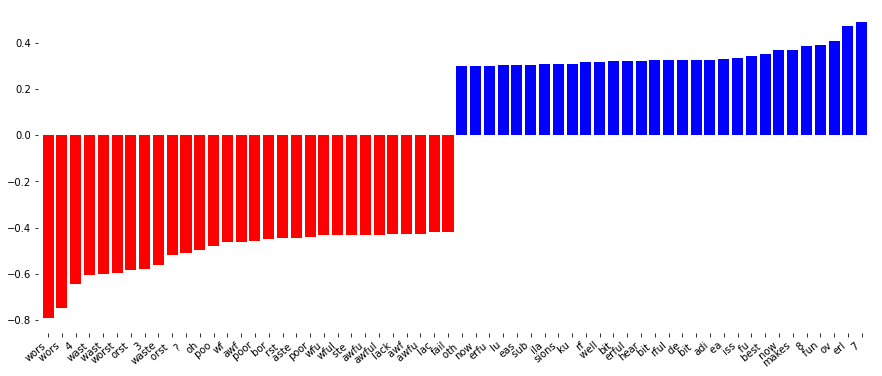

In [74]:
plt.figure(figsize=(15, 6))
plot_important_features(lr_char.coef_.ravel(), np.array(char_vect.get_feature_names()), top_n=30, rotation=40)
ax = plt.gca()
plt.show()

# break




# Predicting Nationality from Name

A more useful application is going back to the European
Parliament. What I'm going to do now is predict nationality
from the name.




<center>
<img src="./images/nationality_name_1.png" style="width: 600px;">
</center>


<center>
<img src="./images/nationality_name_2.png" style="width: 600px;">
</center>


Here's the distribution of the country. This is a very
imbalanced classification.


In [ ]:
import xml.etree.ElementTree as ET
import requests

#response = requests.get("http://www.europarl.europa.eu/meps/en/xml.html?query=full&filter=all")
response = requests.get("https://www.europarl.europa.eu/meps/en/full-list/xml")
data_xml = ET.fromstring(response.text)
members_xml = data_xml.getchildren()
members_dict = [{i.tag: i.text for i in member} for member in members_xml]
members = pd.DataFrame(members_dict)

members.head()
members.to_csv("eu_members.csv")

In [ ]:
bow_pipe = make_pipeline(CountVectorizer(), LogisticRegressionCV())
cross_val_score(bow_pipe, text_mem_train, y_mem_train, scoring='f1_macro')

In [75]:
large=['Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Poland',
       'Romania', 'Netherlands']
y_mem = members.country
data_mem = members.fullName
mask = y_mem.isin(large)
data_mem = data_mem[mask]
y_mem = y_mem[mask]
data_mem.shape
text_mem_train, text_mem_test, y_mem_train, y_mem_test = train_test_split(data_mem, y_mem, stratify=y_mem, random_state=0)

In [78]:
print(data_mem.shape)
print(text_mem_train.shape)
y_mem.value_counts()

(424,)
(318,)


Germany        96
France         79
Italy          76
Spain          59
Poland         52
Romania        33
Netherlands    29
Name: country, dtype: int64

In [79]:
bow_pipe = make_pipeline(CountVectorizer(), LogisticRegression())
print(cross_val_score(bow_pipe, text_mem_train, y_mem_train, scoring='f1_macro'))

char_pipe = make_pipeline(CountVectorizer(analyzer="char_wb"), LogisticRegression())
print(cross_val_score(char_pipe, text_mem_train, y_mem_train, scoring='f1_macro'))

[0.363 0.174 0.221 0.201 0.306]


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

[0.517 0.477 0.583 0.543 0.487]


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Grid-search parameters - will take a long time..

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
              "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 5), (1, 7),
                                               (2, 3), (2, 5), (3, 8), (5, 5)],
              "countvectorizer__min_df": [1, 2, 3],
              "normalizer": [None, Normalizer()]
             }
grid = GridSearchCV(make_pipeline(CountVectorizer(analyzer="char"), Normalizer(), LogisticRegression(),
                                  memory="cache_folder"),
                    param_grid=param_grid, cv=10, scoring="f1_macro"
                   )
grid.fit(text_mem_train, y_mem_train)
print(grid.best_score_)

In [ ]:
print(grid.best_score_)
grid.best_params_



<center>
<img src="./images/grid_search_table.png" style="width: 600px;">
</center>



# Other features
- Length of text
- Number of out-of-vocabularly words
- Presence / frequency of ALL CAPS
- Punctuation...!? (somewhat captured by char ngrams)
- function words 
- POS Tags (use spacy or gensim)
- Sentiment words (good vs bad)
- Whatever makes sense for the task!



# Large Scale Text Vectorization




<center>
<img src="./images/bag_of_words.png" style="width: 600px;">
</center>




<center>
<img src="./images/large_scale_text_vec_2.png" style="width: 600px;">
</center>




# Trade-offs

<table><tr><td>pro</td><td>cons
</td></tr>
<tr><center><td>- Fast</td><td><pre> </pre></td><td>- Can't interpret results</td></center></tr>
<tr><td>- Works for streaming data</td><td><pre> </pre></td><td>- Hard to debug</td></tr>
<tr><td>- Low memory footprint</td><td><pre> </pre></td><td>- (collisions are not a problem for model accuracy)</td></tr>
</table>




# Near drop-in replacement

- Careful: Uses l2 normalization by default!

```python
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X_train = hv.transform(text_train)
X_val = hv.transform(text_val)
```
```python
lr.score(X_val, y_val)
```
```python
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X_train = hv.transform(text_train)
X_val = hv.transform(text_val)
```
```python
X_train.shape
```
```
(18750, 1048576)
```
```python
lr = LogisticRegressionCV().fit(X_train, y_train)
lr.score(X_val, y_val)
```


# Other libraries

## [nltk](https://www.nltk.org/)
- Classic, comprehensive, slightly outdated

## [spaCy](https://spacy.io/)
- recommended; modern, fast; API still changing in parts.

## [gensim](https://radimrehurek.com/gensim/)
- focus on topic modeling

## [re](https://docs.python.org/3/library/re.html)
- focus on regular expressions




# עברית שפה קשה

- tokenization - e.g. acronyms, punctuation (צה"ל, ח"כ, ז'אנר)
- ambiguity: כשרות הגיעה לכתה vs למסעדה יש תעודת כשרות vs מוגש כשרות לציבור
- morphology - creates much larger vocabulary
- nikud - מלא חסר



# Tools for Hebrew

- Translation
- charachter n-grams
- dedicated Hebrew tokenizer (i.e. `hebrew_tokenizer` in python)

In [81]:
import hebrew_tokenizer as ht
hebrew_text = ' אתמול, 8.6.2018, בשעה 11:00 התגייסיתי לצה"ל לחיל-הים'
heb_vec=CountVectorizer().fit([hebrew_text])
heb_vec.get_feature_names() 


/Users/jonathan.schler/Documents/academia/teaching/grad_ml/2021b/slides/L09-text-data


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/hebrew_tokenizer/__init__.py:9: FutureWarning: Possible nested set at position 20
  from hebrew_tokenizer.api import tokenize


['00', '11', '2018', 'אתמול', 'בשעה', 'הים', 'התגייסיתי', 'לחיל', 'לצה']

In [82]:
tokens = ht.tokenize(hebrew_text)  # tokenize returns a generator!
for grp, token, token_num, (start_index, end_index) in tokens:
    print('{}, {}'.format(grp, token))

HEBREW, אתמול
PUNCTUATION, ,
DATE, 8.6.2018
PUNCTUATION, ,
HEBREW, בשעה
HOUR, 11:00
HEBREW, התגייסיתי
HEBREW, לצה"ל
HEBREW, לחיל
PUNCTUATION, -
HEBREW, הים


# Tools for Hebrew

- Translation
- charachter n-grams
- dedicated Hebrew tokenizer (i.e. `hebrew_tokenizer` in python)
- Hebrew morphological analyzer (i.e. YAP - https://nlp.biu.ac.il/~rtsarfaty/onlp/hebrew)

# Morphological analyzer

אתמול התחלתי לשרת  בצה"ל בחיל-הים

<center>
<img src="./images/heb_lemma.png" style="width: 600px;">
</center>


# Morphological analyzer

אתמול התחלתי לשרת  בצה"ל בחיל-הים

<center>
<img src="./images/heb_morph.png" style="width: 600px;">
</center>

# Morphological analyzer

אתמול התחלתי לשרת  בצה"ל בחיל-הים

<center>
<img src="./images/dep_tree.png" style="width: 600px;">
</center>

# Appendix - Data Loading


In addition to `load_files` there are alterantive methods:
- pd.read_csv
- manually add data to csv

Advantage: allows easy data manipulation using DataFrame

In [ ]:
# don't execute the code
df=pd.DataFrame()

walk_dir=os.path.abspath(inputF)
idn=0
for root, subdirs, files in os.walk(walk_dir):
    for file in files:
        if(not file.endswith("docx")):
            #print("skipping..",file)
            continue
        if(file.find("~")!=-1):
            print("skipping..",file)
            continue

        perId,name = getNameFromFileName(file)
        if(name==""): # not relevant file
            continue

        fullTxt = getFullTxtFromWordDoc(os.path.join(root,file)) 

        part1,part2 = splitTxtIntoParts(fullTxt)

        df=df.append({"id":idn,"per_id":perId,"name":name,"part1":part1,"part2":part2,"fn":os.path.join(root,file)},ignore_index=True) 
        idn+=1

In [83]:
import pandas as pd
members=pd.read_csv("eu_members.csv",index_col=0)
members

,fullName,country,politicalGroup,id,nationalPoliticalGroup
0,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,197490,Independent
1,Asim ADEMOV,Bulgaria,Group of the European People's Party (Christia...,189525,Citizens for European Development of Bulgaria
2,Isabella ADINOLFI,Italy,Non-attached Members,124831,Movimento 5 Stelle
3,Matteo ADINOLFI,Italy,Identity and Democracy Group,197826,Lega
4,Alex AGIUS SALIBA,Malta,Group of the Progressive Alliance of Socialist...,197403,Partit Laburista
...,...,...,...,...,...
700,Juan Ignacio ZOIDO ÁLVAREZ,Spain,Group of the European People's Party (Christia...,197621,Partido Popular
701,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,124739,Partido Socialista
702,Željana ZOVKO,Croatia,Group of the European People's Party (Christia...,185341,Hrvatska demokratska zajednica
703,Marco ZULLO,Italy,Renew Europe Group,125237,Independent


In [84]:
members["name_len"]=members["fullName"].apply(lambda x:len(x))
members

corpus=members["politicalGroup"]

,fullName,country,politicalGroup,id,nationalPoliticalGroup,name_len
0,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,197490,Independent,19
1,Asim ADEMOV,Bulgaria,Group of the European People's Party (Christia...,189525,Citizens for European Development of Bulgaria,11
2,Isabella ADINOLFI,Italy,Non-attached Members,124831,Movimento 5 Stelle,17
3,Matteo ADINOLFI,Italy,Identity and Democracy Group,197826,Lega,15
4,Alex AGIUS SALIBA,Malta,Group of the Progressive Alliance of Socialist...,197403,Partit Laburista,17
...,...,...,...,...,...,...
700,Juan Ignacio ZOIDO ÁLVAREZ,Spain,Group of the European People's Party (Christia...,197621,Partido Popular,26
701,Carlos ZORRINHO,Portugal,Group of the Progressive Alliance of Socialist...,124739,Partido Socialista,15
702,Željana ZOVKO,Croatia,Group of the European People's Party (Christia...,185341,Hrvatska demokratska zajednica,13
703,Marco ZULLO,Italy,Renew Europe Group,125237,Independent,11



# Questions ?


    